# Numerical Methods for Differential Equations with Python

Often, differential equations cannot be solved analytically, or their solutions are too complex to find by hand. In such cases, **numerical methods** provide approximate solutions. Two widely used approaches are **Euler’s method** and **Runge-Kutta methods**.

This tutorial introduces these methods and shows how to implement them in Python.

---

## 1. Introduction to Numerical Methods

Numerical methods approximate the solution of an ordinary differential equation (ODE):

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

by stepping forward in small increments $ h $, calculating approximate values at discrete points.

---

## 2. Euler’s Method

The **Euler method** is the simplest numerical method for ODEs. Given $ y_{n} $ at $ x_{n} $, the next value is:

$$
y_{n+1} = y_{n} + h \cdot f(x_{n}, y_{n})
$$

### **Python Implementation**

Let's solve $ \frac{dy}{dx} = x + y, \quad y(0) = 1 $ with Euler’s method.

Matplotlib is building the font cache; this may take a moment.


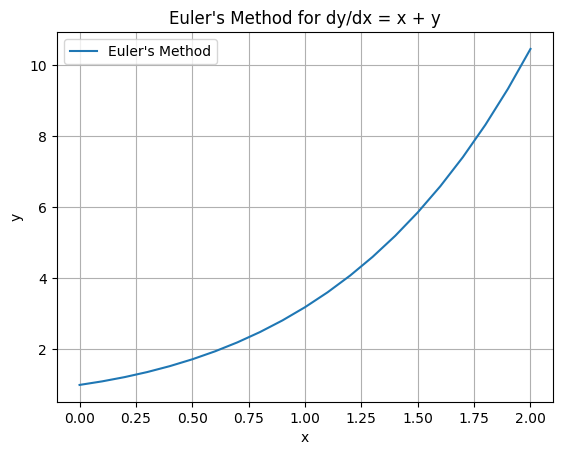

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE
def f(x, y):
    return x + y

# Euler's method
def euler(f, x0, y0, h, n_steps):
    xs = [x0]
    ys = [y0]
    x, y = x0, y0
    for _ in range(n_steps):
        y += h * f(x, y)
        x += h
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Parameters
x0 = 0
y0 = 1
h = 0.1
n_steps = 20

xs, ys = euler(f, x0, y0, h, n_steps)

plt.plot(xs, ys, label="Euler's Method")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Euler's Method for dy/dx = x + y")
plt.legend()
plt.grid(True)
plt.show()

## 3. Runge-Kutta Methods

**Runge-Kutta methods** are more accurate than Euler’s method. The most common is the **4th-order Runge-Kutta (RK4)**.

### **RK4 Formula**

Given $ y_{n} $ at $ x_{n} $:

$$
\begin{align*}
k_1 &= f(x_n, y_n) \\
k_2 &= f(x_n + h/2, y_n + h k_1/2) \\
k_3 &= f(x_n + h/2, y_n + h k_2/2) \\
k_4 &= f(x_n + h, y_n + h k_3) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

### **Python Implementation**

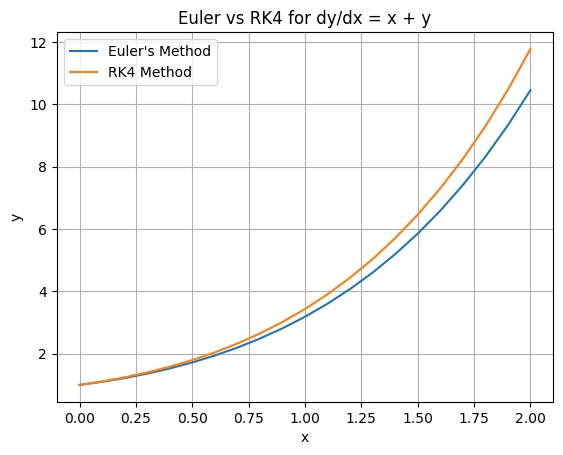

In [2]:
def rk4(f, x0, y0, h, n_steps):
    xs = [x0]
    ys = [y0]
    x, y = x0, y0
    for _ in range(n_steps):
        k1 = f(x, y)
        k2 = f(x + h/2, y + h*k1/2)
        k3 = f(x + h/2, y + h*k2/2)
        k4 = f(x + h, y + h*k3)
        y += (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x += h
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

xs_rk4, ys_rk4 = rk4(f, x0, y0, h, n_steps)

plt.plot(xs, ys, label="Euler's Method")
plt.plot(xs_rk4, ys_rk4, label='RK4 Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Euler vs RK4 for dy/dx = x + y")
plt.legend()
plt.grid(True)
plt.show()

## 4. Comparison with Analytical Solution

The analytical solution for $ \frac{dy}{dx} = x + y, \, y(0)=1 $:

$$
y(x) = 2e^{x} - x - 1
$$

You can plot this alongside the numerical solutions:

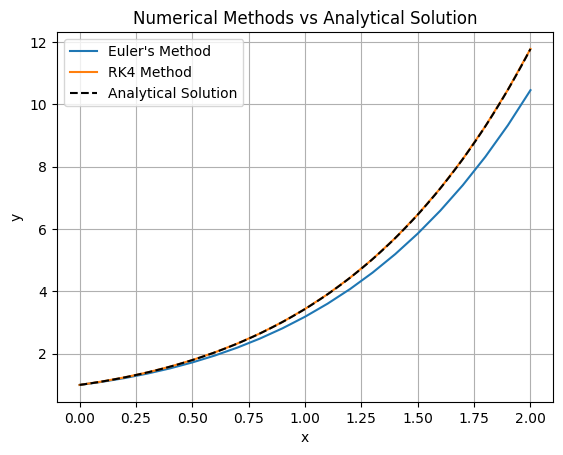

In [3]:
y_analytical = lambda x: 2 * np.exp(x) - x - 1
xs_dense = np.linspace(x0, x0 + n_steps * h, 100)
ys_analytical = y_analytical(xs_dense)

plt.plot(xs, ys, label="Euler's Method")
plt.plot(xs_rk4, ys_rk4, label='RK4 Method')
plt.plot(xs_dense, ys_analytical, 'k--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Numerical Methods vs Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

## 5. Using SciPy's Built-in Solvers

For most real-world problems, use `scipy.integrate.solve_ivp`, which uses advanced Runge-Kutta methods by default.

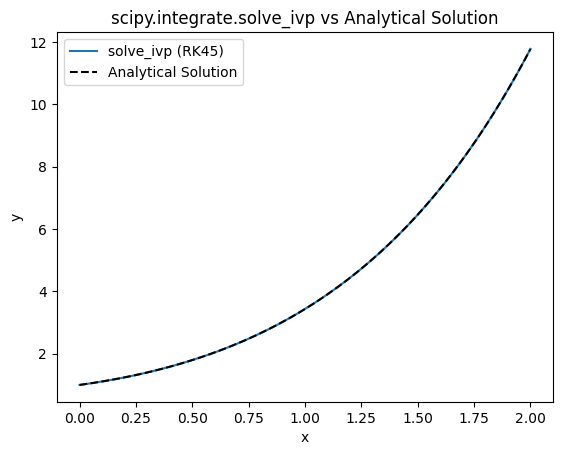

In [4]:
from scipy.integrate import solve_ivp

sol = solve_ivp(f, [x0, x0 + n_steps * h], [y0], t_eval=xs_dense)
plt.plot(sol.t, sol.y[0], label='solve_ivp (RK45)')
plt.plot(xs_dense, ys_analytical, 'k--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("scipy.integrate.solve_ivp vs Analytical Solution")
plt.show()

## 6. Summary

- **Euler’s method:** Simple, but less accurate.
- **Runge-Kutta (RK4):** Much more accurate for the same step size.
- **scipy.integrate.solve_ivp:** Recommended for real-world applications.
- Always compare with analytical solutions when possible to check accuracy.

---

# [Differential Equations Context](./README.md)